<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples= 1000, n_features= 2, centers =5, random_state=3)

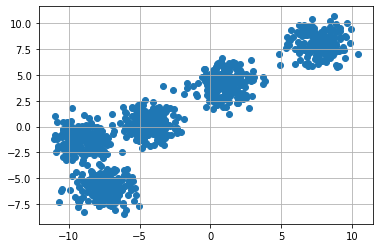

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
plt.show()

In [4]:
k = 5
colours = ['green', 'red', 'blue', 'yellow', 'orange']

clusters = {}
for i in range(k):
    points = []
    center = 10*(2*np.random.random((x.shape[1],))-1)
    cluster = {
        'center':center,
        'color':colours[i],
        'points':points
    }
    clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([-5.50417156, -2.83159531]),
  'color': 'green',
  'points': []},
 1: {'center': array([-8.65057299,  8.12937973]),
  'color': 'red',
  'points': []},
 2: {'center': array([-5.8778278 , -3.73085416]),
  'color': 'blue',
  'points': []},
 3: {'center': array([-0.69889483, -5.35542933]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([9.64646581, 1.96733892]),
  'color': 'orange',
  'points': []}}

In [6]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
def assignPointsToClusters(clusters):
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)

In [11]:
assignPointsToClusters(clusters)

In [41]:
#M-step
def updateCluster(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

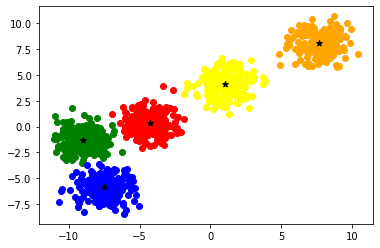

In [47]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateCluster(clusters)